# Project description

Material Informatics is a very perspective field of knowledge. It allows to use machine learning technologies to obtain a new sense from a huge amount of gathered experimental data about mechanical properties of definite materials.

A determination of a dependency of material properties from a structure or a composition of a material is one of the core fundamental problems while new materials creation. This problem may be solved in the frame of Material Informatics with methods of machine learning. Given an experimental data about structure components and mechanical properties of existing (known) materials, one can build a ML-models to predict properties of some new material on the base of its structure.

We will consider "MatNavi Mechanical properties of low-alloy steels" dataset: https://www.kaggle.com/datasets/konghuanqing/matnavi-mechanical-properties-of-lowalloy-steels?resource=download
This dataset contains data about percentage of elements in a structure of definite low-alloy steels and some mechanical properties of these steels. We will select among all mechanical properties a tensile strength as a target variable, because this property is one of the most widely used in mechanical engineering (to provide sufficient safety factor of details and constructions).

The aim of this project is to build ML-model, which allows to predict tensile strength of low-alloy steel with a given temperature and percentages of structural elements.

# 1. Imports and loading data

In [1]:
import urllib.request
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/ElenaNKn/ml-zoomcamp-solutions/master/capstone_project/mechanical_properties_low-alloy_steels.csv'
filename = 'mechanical_properties_low-alloy_steels.csv'
urllib.request.urlretrieve(url, filename)

In [2]:
df = pd.read_csv('mechanical_properties_low-alloy_steels.csv', header=0, sep=',')

In [3]:
df.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


# 2. Cleaning data

In [4]:
# handle headers of a dataframe

df.columns = df.columns.str.lower().str.lstrip()
df.columns = df.columns.str.replace('+', 'and', regex=True).str.replace('°c', 'celcius', regex=True)
df.columns = df.columns.str.replace(' ', '_').str.replace('+', 'and', regex=True)
df.columns = df.columns.str.replace('(', '', regex=True).str.replace(')', '', regex=True)

In [5]:
df.head()

,alloy_code,c,si,mn,p,s,ni,cr,mo,cu,v,al,n,ceq,nb_and_ta,temperature_celcius,0.2%_proof_stress_mpa,tensile_strength_mpa,elongation_%,reduction_in_area_%
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


In [6]:
# exclude mechanical properties, except target

del df['0.2%_proof_stress_mpa']
del df['elongation_%']
del df['reduction_in_area_%']

In [7]:
df.head()

,alloy_code,c,si,mn,p,s,ni,cr,mo,cu,v,al,n,ceq,nb_and_ta,temperature_celcius,tensile_strength_mpa
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,490
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,454
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,465
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,495
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,489


In [8]:
df.isnull().sum()   # checking for missing values

alloy_code              0
c                       0
si                      0
mn                      0
p                       0
s                       0
ni                      0
cr                      0
mo                      0
cu                      0
v                       0
al                      0
n                       0
ceq                     0
nb_and_ta               0
temperature_celcius     0
tensile_strength_mpa    0
dtype: int64

In [9]:
df.dtypes    # checking types of columns

alloy_code               object
c                       float64
si                      float64
mn                      float64
p                       float64
s                       float64
ni                      float64
cr                      float64
mo                      float64
cu                      float64
v                       float64
al                      float64
n                       float64
ceq                     float64
nb_and_ta               float64
temperature_celcius       int64
tensile_strength_mpa      int64
dtype: object

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
c,915.0,0.174929,0.059674,0.0900,0.1300,0.1600,0.200,0.3400
si,915.0,0.310918,0.086871,0.1800,0.2400,0.3000,0.370,0.5200
mn,915.0,0.812962,0.342775,0.4200,0.5000,0.6800,1.210,1.4800
p,915.0,0.014543,0.005244,0.0060,0.0100,0.0140,0.018,0.0300
s,915.0,0.010602,0.004024,0.0030,0.0080,0.0100,0.012,0.0220
ni,915.0,0.143016,0.172746,0.0000,0.0230,0.0500,0.210,0.6000
cr,915.0,0.427861,0.457568,0.0000,0.0400,0.1100,1.000,1.3100
mo,915.0,0.442870,0.394383,0.0050,0.0500,0.5000,0.560,1.3500
cu,915.0,0.079148,0.058481,0.0000,0.0400,0.0700,0.110,0.2500
v,915.0,0.060190,0.096403,0.0000,0.0000,0.0000,0.070,0.3000


Let's explore, what the content of dataframe columns is.

First columns are percentage of definite chemical elements in steels:
C - Carbon
Si - Silicon
Mn - Manganese
P - Phosphorus
S - Sulfur
Ni - Nickel
Cr - Chromium
Mo - Molybdenum
Cu - Copper
V - Vanadium
Al - Aluminum
N - Nitrogen
Nb - Niobium
Ta is likely an error name. The thing is that there is no element like "Ta" in the periodic table. But low-alloy steel may contain Titanium ("Ti") (https://www.matweb.com/search/datasheet_print.aspx?matguid=d1bdbccde4da4da4a9dbb8918d783b29).

Let's correct this error in a dataframe head

In [11]:
df.columns = df.columns.str.lower().str.replace('ta', 'ti')

Now let's explore, what "ceq" is.

As follows from https://www.kobelco-welding.jp/education-center/abc/ABC_2007-01.html "Ceq" is an coefficient which is called "Carbon equivalent". It assess the effect of composition while welding of low alloy steels. It is calculated by the formula 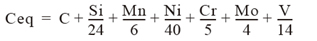

So "ceq" is calculated from other features of our dataset and we need to exclude it.

In [12]:
del df['ceq']

Now let's explore our dataset ones again 

In [13]:
df.head(n=22)

,alloy_code,c,si,mn,p,s,ni,cr,mo,cu,v,al,n,nb_and_ti,temperature_celcius,tensile_strength_mpa
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,27,490
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,100,454
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,200,465
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,300,495
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,400,489
5,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,450,461
6,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,500,431
7,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,550,387
8,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,600,314
9,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,650,226


The first column of our dataframe is an alloy code. So the first 10 rows of dataframe contains values of tensile stress for the first material (MBB) with different temperatures, the next 10 rows - for the second material and so on.

Alloy code is very important for engineering task, but in the ML model it brings no actual sence. It just makes sence for model that **material with given percentage of elements and temperature have this value of tensile strength**. That is why it's reasonably to exclude "alloy_code" column out of the dataframe.

In [14]:
del df['alloy_code']

The dataframe is ready to perform exploratory data analysis.

In [15]:
df

,c,si,mn,p,s,ni,cr,mo,cu,v,al,n,nb_and_ti,temperature_celcius,tensile_strength_mpa
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0000,27,490
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0000,100,454
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0000,200,465
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0000,300,495
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0000,400,489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0017,350,632
911,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0017,400,575
912,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0017,450,500
913,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0017,500,428


# 3. Exploratory data analysis